In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter



# def histogram(data=[], title="", xlabel="None", ylabel="None",
#                    labels=None, bins=None, width=None, alpha=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     plt.hist(data, rwdith=width, bins=bins, alpha=alpha, label=labels)
#     plt.savefig(title+".pdf")
#     plt.show()

# def line_plot(x=[], y=[], title="", xlabel="None", ylabel="None",
#                    log_xscale=True, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     if isinstance(y[0],list):
#         for i in range(len(y)):
#             plt.plot(x,y[i],label=labels[i])
#         plt.legend()
#     else:
#         plt.plot(x,y)
#     plt.savefig(title+".pdf")
#     plt.show()

# def scatter_plot(x=[], y=[], z=[] title="", xlabel="None", ylabel="None", zlabel="None",
#                    log_xscale=True, log_yscale=False, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if log_yscale:
#         plt.yscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     sc=[plt.scatter(x,y,c=z,cmap=cm, s=150)]

#     plt.savefig(title+".pdf")
#     plt.show()

In [21]:
def line_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/'+fileName+'.csv')
    print(df)
    
    df['FilterType'] = df['FilterType'].astype(str)
    bloom = df[df['FilterType'] == 'Bloom']
    cuckoo = df[df['FilterType'] == 'Cuckoo']
    xor = df[df['FilterType'] == 'Xor']
    blockedbloom = df[df['FilterType'] == 'Blocked Bloom']
    theory = df[df['FilterType'] == 'Lower Bound']

    if iter:
        bloom = bloom.groupby(x)[y].mean().reset_index()
        cuckoo = cuckoo.groupby(x)[y].mean().reset_index()
        xor = xor.groupby(x)[y].mean().reset_index()
        blockedbloom = blockedbloom.groupby(x)[y].mean().reset_index()
    
    print(df['FilterType'].unique())
    plt.figure()

    if xscale:
        plt.xscale('log')
    
    plt.plot(bloom[x], bloom[y], label='BloomFilter')
    plt.plot(cuckoo[x], cuckoo[y], label='CuckooFilter')
    plt.plot(blockedbloom[x], blockedbloom[y], label='BlockedBloomFilter')
    plt.plot(xor[x], xor[y], label='XORFilter')
    if bound:
        plt.plot(theory[x], theory[y], label='Lower Bound', linestyle = '--')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

In [41]:
def bar_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/'+fileName+'.csv')
    print(df)
    
    df['FilterType'] = df['FilterType'].astype(str)
    bloom = df[df['FilterType'] == 'Bloom']
    cuckoo = df[df['FilterType'] == 'Cuckoo']
    xor = df[df['FilterType'] == 'Xor']
    blockedbloom = df[df['FilterType'] == 'Blocked Bloom']
    theory = df[df['FilterType'] == 'Lower Bound']

    # if iter:
    #     bloom = bloom.groupby(x)[y].mean().reset_index()
    #     cuckoo = cuckoo.groupby(x)[y].mean().reset_index()
    #     xor = xor.groupby(x)[y].mean().reset_index()
    #     blockedbloom = blockedbloom.groupby(x)[y].mean().reset_index()
    if iter:
        grouped = df.groupby(['FilterType', x][y].agg(['mean','std','count']).reset_index()
        grouped['stderr'] = grouped['std'] / np.sqrt(grouped['count']
        bloom = grouped[grouped['FilterType'] == 'Bloom']
        cuckoo = grouped[grouped['FilterType'] == 'Cuckoo']
        xor = grouped[grouped['FilterType'] == 'Xor']
        blockedbloom = grouped[grouped['FilterType'] == 'Blocked Bloom']

    print(df['FilterType'].unique())
    x_values = df[x].unique()
    x_pos = np.arange(len(x_values))
    width=0.2
    plt.figure()

    if xscale:
        plt.xscale('log')

    for i, xval in enumerate(x_values):
        plt.bar(i - width*1.5, bloom[bloom[x] == x_val]['mean'], width, yerr=bloom[bloom[x] == x_val]['stderr'], label='BloomFilter', capsize=5)
        plt.bar(i - width*0.5, cuckoo[cuckoo[x] == x_val]['mean'], width, yerr=cuckoo[cuckoo[x] == x_val]['stderr'], label='CuckooFilter', capsize=5)
        plt.bar(i + width*0.5, blockedbloom[blockedbloom[x] == x_val]['mean'], width, yerr=blockedbloom[blockedbloom[x] == x_val]['stderr'], label='BlockedBloomFilter', capsize=5)
        plt.bar(i + width*1.5, xor[xor[x] == x_val]['mean'], width, yerr=xor[xor[x] == x_val]['stderr'], label='XORFilter', capsize=5)
    if bound:
        plt.bar(theory[x], theory[y], label='Lower Bound', linestyle = '--')

    plt.xticks(x_pos, labels.np.round(x_values, 2))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1241139003.py, line 18)

     FilterType          n     fpr        bpi  iteration
0         Bloom  1000000.0  0.0001  19.170176         -1
1        Cuckoo  1000000.0  0.0001  18.085106         -1
2           Xor  1000000.0  0.0001  17.220448         -1
3   Lower Bound  1000000.0  0.0001  13.287712         -1
4         Bloom  1000000.0  0.0010  14.377600         -1
5        Cuckoo  1000000.0  0.0010  13.829787         -1
6           Xor  1000000.0  0.0010  12.300320         -1
7   Lower Bound  1000000.0  0.0010   9.965784         -1
8         Bloom  1000000.0  0.0100   9.585088         -1
9        Cuckoo  1000000.0  0.0100  10.638298         -1
10          Xor  1000000.0  0.0100   8.610224         -1
11  Lower Bound  1000000.0  0.0100   6.643856         -1
12        Bloom  1000000.0  0.1000   4.792576         -1
13       Cuckoo  1000000.0  0.1000   7.446809         -1
14          Xor  1000000.0  0.1000   4.920128         -1
15  Lower Bound  1000000.0  0.1000   3.321928         -1
['Bloom' 'Cuckoo' 'Xor' 'Lower 

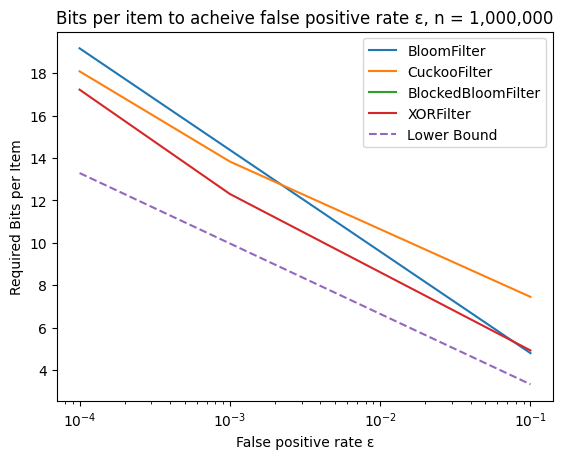

In [27]:
line_plot(fileName="bpi_fpr", x="fpr", y="bpi", figureName='Bits per item to acheive false positive rate ε, n = 1,000,000', 
          xscale=True, xlabel="False positive rate ε", ylabel="Required Bits per Item", bound=True)

# line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of number of keys', 
#           xscale=True, xlabel="Number of Keys Inserted", ylabel="Construction time per key (ns)")



        FilterType            n   constTime   fpr  iteration
0            Bloom      10000.0    7.854200  0.01          1
1           Cuckoo      10000.0   63.929100  0.01          1
2    Blocked Bloom      10000.0    2.195900  0.01          1
3              Xor      10000.0  334.691600  0.01          1
4            Bloom      10000.0    8.316600  0.01          2
..             ...          ...         ...   ...        ...
195            Xor  100000000.0   36.232044  0.01          9
196          Bloom  100000000.0    0.383810  0.01         10
197         Cuckoo  100000000.0    0.402006  0.01         10
198  Blocked Bloom  100000000.0    0.008187  0.01         10
199            Xor  100000000.0   36.094946  0.01         10

[200 rows x 5 columns]
['Bloom' 'Cuckoo' 'Blocked Bloom' 'Xor']


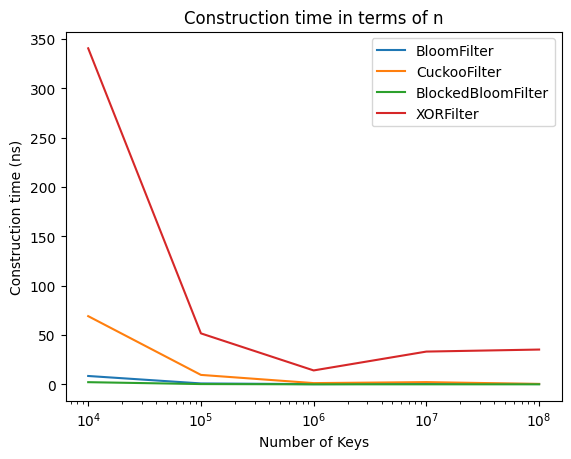

In [28]:
line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of n', 
          xscale=True, xlabel="Number of Keys", ylabel="Construction time (ns)", iter=True, bound=False)

In [42]:
bar_plot(fileName="lf_negQueryTime", x="lf", y="queryTime", figureName='Negative Query time in terms of n', 
          xscale=False, xlabel="Load factor", ylabel="Negative Query time (ns)", iter=True, bound=False)

        FilterType   lf  queryTime          n  iteration
0            Bloom  0.0      35.83  1000000.0          1
1           Cuckoo  0.0     329.58  1000000.0          1
2    Blocked Bloom  0.0      93.33  1000000.0          1
3              Xor  0.0      59.59  1000000.0          1
4            Bloom  0.0      32.92  1000000.0          2
..             ...  ...        ...        ...        ...
195            Xor  1.0       9.59  1000000.0          9
196          Bloom  1.0    6613.75  1000000.0         10
197         Cuckoo  1.0    5603.33  1000000.0         10
198  Blocked Bloom  1.0     167.50  1000000.0         10
199            Xor  1.0      15.84  1000000.0         10

[200 rows x 5 columns]
['Bloom' 'Cuckoo' 'Blocked Bloom' 'Xor']


NameError: name 'yerr' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
bar_plot(fileName="lf_posQueryTime", x="lf", y="queryTime", figureName='Positive Query time in terms of n', 
          xscale=False, xlabel="Load factor", ylabel="Negative Query time (ns)", iter=True, bound=False)